In [1]:
%matplotlib widget

# Noise analysis [Q]
# and Solution space cross-sections

Date created: 24/04/2024
Author: @mariacarrizo

In [2]:
# Import libraries
import numpy as np
import pygimli as pg
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import sys
sys.path.insert(1, '../../src')

# Import functions
from EM1D import SolSpa_2Lay_sigma1_Q, SolSpa_2Lay_sigma2_Q
from Plots import Plot_SolSpa_sigma1, Plot_SolSpa_sigma2

In [3]:
# Load model and data
# True models
model_A1_1 = np.load('models/model_synth_2Lay_A1_1.npy')
model_A1_2 = np.load('models/model_synth_2Lay_A1_2.npy')
model_A1_3 = np.load('models/model_synth_2Lay_A1_3.npy')
model_A1_4 = np.load('models/model_synth_2Lay_A1_4.npy')

# True data
data_A1_1 = np.load('data/data_synth_2Lay_A1_1.npy')
data_A1_2 = np.load('data/data_synth_2Lay_A1_2.npy')
data_A1_3 = np.load('data/data_synth_2Lay_A1_3.npy')
data_A1_4 = np.load('data/data_synth_2Lay_A1_4.npy')

# Estimated data case A1-1 GS
data_A1_1_GS = np.load('data/data_GS_A1_1.npy')

# Load Lookup table
LUT = np.load('../data/LUTable_2Lay.npy')
conds = np.load('../data/conds.npy')
thicks = np.load('../data/thicks.npy')
nsl = len(conds) # sampling number

# Load survey parameters
survey = np.load('../data/survey_2Lay.npy', allow_pickle=True).item()
offsets = survey['offsets']
height = survey['height']
freq = survey['freq']
lambd = survey['lambd']
filt = survey['filt']

# Load estimated model from Global Search
model_GS_A1_1 = np.load('results/model_GS_Q_A1_1.npy')
model_GS_A1_2 = np.load('results/model_GS_Q_A1_2.npy')
model_GS_A1_3 = np.load('results/model_GS_Q_A1_3.npy')
model_GS_A1_4 = np.load('results/model_GS_Q_A1_4.npy')

# Load estimated models from Gauss-Newton
model_GN_A1_1 = np.load('results/model_GN_Q_A1_1.npy')
model_GN_A1_2 = np.load('results/model_GN_Q_A1_2.npy')
model_GN_A1_3 = np.load('results/model_GN_Q_A1_3.npy')
model_GN_A1_4 = np.load('results/model_GN_Q_A1_4.npy')

# For example let's check the 1D model following position
pos = 10


In [4]:
# Initial model used for Gauss-Newton inversion
model_ini = np.array([3, 500/1000, 500/1000])

# Load update history of the Gauss-Newton inversion of 1D model in position x=10 m
model_GN_A1_1_hist = np.load('results/model_GN_A1_1_hist_Q.npy')
model_GN_A1_2_hist = np.load('results/model_GN_A1_2_hist_Q.npy')
model_GN_A1_3_hist = np.load('results/model_GN_A1_3_hist_Q.npy')
model_GN_A1_4_hist = np.load('results/model_GN_A1_4_hist_Q.npy')

# Calculate solution space using Q data only

In [6]:
# Calculate solution space values

err_A1_1_s1, models_err_A1_1_s1 = SolSpa_2Lay_sigma1_Q(lambd, height, offsets, freq, filt, model_A1_1, data_A1_1, pos, thicks, conds)
err_A1_2_s1, models_err_A1_2_s1 = SolSpa_2Lay_sigma1_Q(lambd, height, offsets, freq, filt, model_A1_2, data_A1_2, pos, thicks, conds)
err_A1_3_s1, models_err_A1_3_s1 = SolSpa_2Lay_sigma1_Q(lambd, height, offsets, freq, filt, model_A1_3, data_A1_3, pos, thicks, conds)
err_A1_4_s1, models_err_A1_4_s1 = SolSpa_2Lay_sigma1_Q(lambd, height, offsets, freq, filt, model_A1_4, data_A1_4, pos, thicks, conds)

err_A1_1_s2, models_err_A1_1_s2 = SolSpa_2Lay_sigma2_Q(lambd, height, offsets, freq, filt, model_A1_1, data_A1_1, pos, thicks, conds)
err_A1_2_s2, models_err_A1_2_s2 = SolSpa_2Lay_sigma2_Q(lambd, height, offsets, freq, filt, model_A1_2, data_A1_2, pos, thicks, conds)
err_A1_3_s2, models_err_A1_3_s2 = SolSpa_2Lay_sigma2_Q(lambd, height, offsets, freq, filt, model_A1_3, data_A1_3, pos, thicks, conds)
err_A1_4_s2, models_err_A1_4_s2 = SolSpa_2Lay_sigma2_Q(lambd, height, offsets, freq, filt, model_A1_4, data_A1_4, pos, thicks, conds)

# Plot Solution space cross-sections

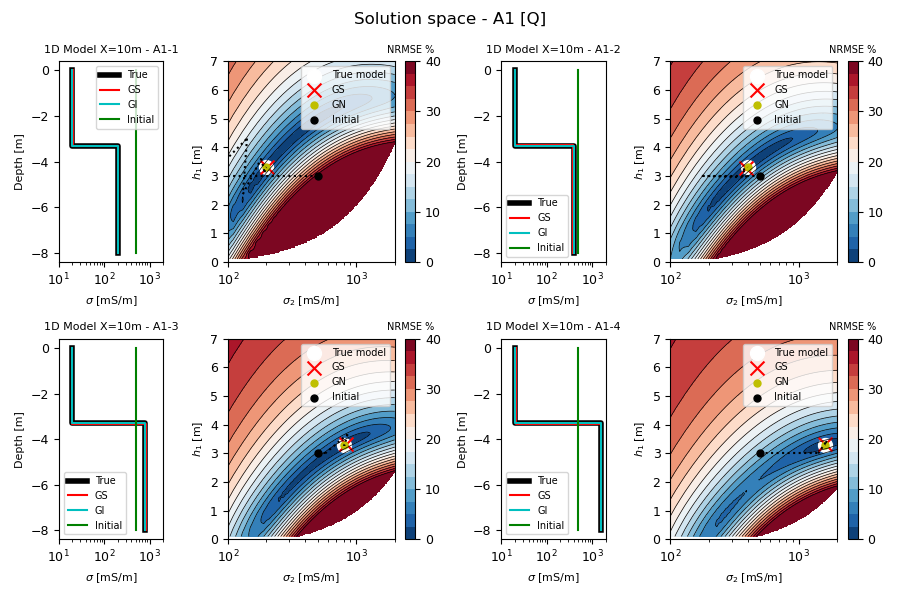

In [7]:
fig, ax = plt.subplots(2,4, figsize=(9,6), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

Plot_SolSpa_sigma1(fig, ax[0,0], ax[0,1], model_A1_1[pos], model_GS_A1_1[pos], model_GN_A1_1[pos], model_ini, model_GN_A1_1_hist,
                   err_A1_1_s1, models_err_A1_1_s1, pos, case='A1-1')
Plot_SolSpa_sigma1(fig, ax[0,2], ax[0,3], model_A1_2[pos], model_GS_A1_2[pos], model_GN_A1_2[pos], model_ini, model_GN_A1_2_hist,
                   err_A1_2_s1, models_err_A1_2_s1, pos, case='A1-2')
Plot_SolSpa_sigma1(fig, ax[1,0], ax[1,1], model_A1_3[pos], model_GS_A1_3[pos], model_GN_A1_3[pos], model_ini, model_GN_A1_3_hist,
                   err_A1_3_s1, models_err_A1_3_s1, pos, case='A1-3')
Plot_SolSpa_sigma1(fig, ax[1,2], ax[1,3], model_A1_4[pos], model_GS_A1_4[pos], model_GN_A1_4[pos], model_ini, model_GN_A1_4_hist,
                   err_A1_4_s1, models_err_A1_4_s1, pos, case='A1-4')
fig.suptitle('Solution space - A1 [Q]')
plt.tight_layout()
#plt.show()
#plt.savefig('figures/ErrorSpace_caseA1.eps', format='eps')

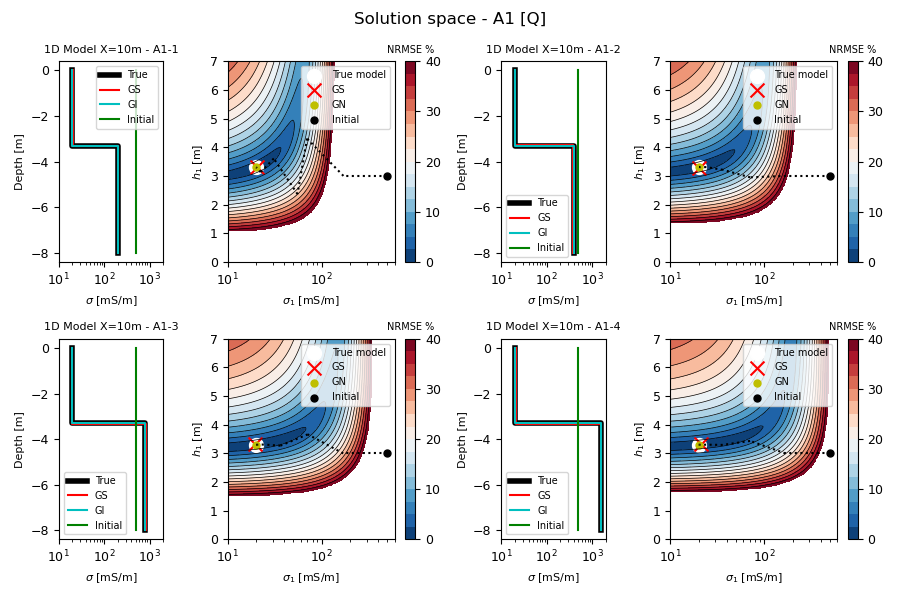

In [9]:
fig, ax = plt.subplots(2,4, figsize=(9,6), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

Plot_SolSpa_sigma2(fig, ax[0,0], ax[0,1], model_A1_1[pos], model_GS_A1_1[pos], model_GN_A1_1[pos], model_ini, model_GN_A1_1_hist,
               err_A1_1_s2, models_err_A1_1_s2, pos, case='A1-1')
Plot_SolSpa_sigma2(fig, ax[0,2], ax[0,3], model_A1_2[pos], model_GS_A1_2[pos], model_GN_A1_2[pos], model_ini, model_GN_A1_2_hist,
               err_A1_2_s2, models_err_A1_2_s2, pos, case='A1-2')
Plot_SolSpa_sigma2(fig, ax[1,0], ax[1,1], model_A1_3[pos], model_GS_A1_3[pos], model_GN_A1_3[pos], model_ini, model_GN_A1_3_hist,
               err_A1_3_s2, models_err_A1_3_s2, pos, case='A1-3')
Plot_SolSpa_sigma2(fig, ax[1,2], ax[1,3], model_A1_4[pos], model_GS_A1_4[pos], model_GN_A1_4[pos], model_ini, model_GN_A1_4_hist,
               err_A1_4_s2, models_err_A1_4_s2, pos, case='A1-4')
fig.suptitle('Solution space - A1 [Q]')
plt.tight_layout()
#plt.show()
#plt.savefig('figures/ErrorSpace_caseA1.eps', format='eps')